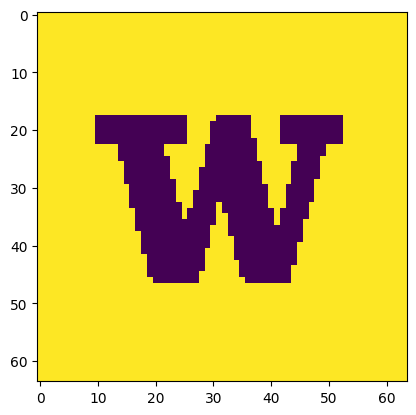

In [1]:
#Import an image

import numpy as np 
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open('UW-logo-64.png')

#set when to be black or white
threshold = 7

#convert image to a list of pixels
pixels = list(img.getdata())
#print(pixels)

# convert data list to contain only black or white
newPixels = []
for pixel in pixels:
    # if looks like black, convert to black
    if pixel[0] <= threshold:
        newPixel = 1
    # if looks like white, convert to white
    else:
        newPixel = 0
    newPixels.append(newPixel)

newImg = Image.new(img.mode, img.size)
array = np.reshape(newPixels, img.size)

plt.imshow(array, interpolation='nearest')
plt.show()
np.printoptions(precision=1)
np.savetxt('test_data.txt',array)

In [2]:
#Import keys

Akey = []
for i in range(9):
    try:
        arr = np.loadtxt("Alice_0"+str(i)+".csv", delimiter=";", dtype=str)
        arr = np.transpose(arr)
        arr = arr[2]
        
        Akey = np.concatenate((Akey,arr), axis=0)
    except:
        pass
        
Akey = np.delete(Akey, np.where(Akey == 'BITVALUE'))
Akey = Akey.astype(int)    
#print(Akey)

Bkey = []
for i in range(9):
    try:
        arr = np.loadtxt("Bob_0"+str(i)+".csv", delimiter=";", dtype=str)
        arr = np.transpose(arr)
        arr = arr[2]
        
        Bkey = np.concatenate((Bkey,arr), axis=0)
    except:
        pass
        
Bkey = np.delete(Bkey, np.where(Bkey== 'BITVALUE'))
Bkey = Bkey.astype(int)    
#print(Bkey)


In [3]:
#Encode the image as Alice

Akey = Akey[:np.size(array)]
Akey = np.reshape(Akey, img.size)

array = array ^ Akey

array = array.astype(int)  
plt.imshow(array, interpolation='nearest')
plt.show()
np.printoptions(precision=1)
np.savetxt('test_data.txt',array)

#Decode the image as Bob

Bkey = Bkey[:np.size(array)]
Bkey = np.reshape(Bkey, img.size)

array = array ^ Bkey

array = array.astype(int)  
plt.imshow(array, interpolation='nearest')
plt.show()
np.printoptions(precision=1)
np.savetxt('test_data.txt',array)

ValueError: cannot reshape array of size 771 into shape (64,64)